In [105]:
import os
def is_running_on_kaggle():
    return 'KAGGLE_URL_BASE' in os.environ

print('Running on Kaggle' if is_running_on_kaggle() else 'Running on local machine')

Running on local machine


In [106]:
DATA_PATH = '/kaggle/input/sentiment-analysis-dataset/' if is_running_on_kaggle() else 'data/'
TRAIN_FILE = DATA_PATH + 'train.csv'

In [107]:
import pandas as pd
df = pd.read_csv(TRAIN_FILE)

In [108]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
for word in ['not', 'no', 'nor']:
    stop_words.remove(word)

In [109]:
from nltk.stem import PorterStemmer
import nltk
import preprocessor as p
import string
import re
import contractions

def clean_tweet(row):
    text = row['text']
    p.set_options(p.OPT.URL, p.OPT.EMOJI)
    clean_text = p.clean(text)
    lower_text = clean_text.lower()
    
    expanded_text = contractions.fix(lower_text)
    fixed_text = expanded_text.replace('[^\w\s]',' ').replace('\s\s+', ' ').translate(str.maketrans('', '', string.punctuation))
    return fixed_text

def tokenize_tweet(row):
    text = row['cleaned_text']# if 'cleaned_text' in row else row['text']
    tokens = p.tokenize(text).split()
    st = PorterStemmer()
    tokens = [st.stem(word) for word in tokens]
    filtered_tokens = [w for w in tokens if not w in stop_words]
    return filtered_tokens

In [110]:
df.head(10)

textID                                               text  \
0  28ac06f416                        good luck with your auction   
1  92098cf9a7  Hmm..You can`t judge a book by looking at its ...   
2  7858ff28f2   Hello, yourself. Enjoy London. Watch out for ...   
3  b0c9c67f32         We can`t even call you from belgium  sucks   
4  7b36e9e7a5                                 not so good mood..   
5  e158681396  Jumping im the shower after a long day of work...   
6  cbee62d9e7                                     OK! Oops sorry   
7  a12462e5d2   says Finally, Im home.  http://plurk.com/p/rr121   
8  60aebb5378  I am native, not french ! I hate this ! !  ! T...   
9  72beba1ba7                                    what a cute dog   

                                       selected_text sentiment  
0                        good luck with your auction  positive  
1  Hmm..You can`t judge a book by looking at its ...   neutral  
2                                    They`re mental.  negative  
3                                            m  suck  negative  
4                                 not so good mood..  negative  
5                                           ahmazing  positive  
6                                              sorry  negative  
7                             says Finally, Im home.   neutral  
8                                              SUCK,  negative  
9                                    what a cute dog  positive

In [111]:
df['cleaned_text']= df.apply(clean_tweet, axis=1)
df.head(10)

textID                                               text  \
0  28ac06f416                        good luck with your auction   
1  92098cf9a7  Hmm..You can`t judge a book by looking at its ...   
2  7858ff28f2   Hello, yourself. Enjoy London. Watch out for ...   
3  b0c9c67f32         We can`t even call you from belgium  sucks   
4  7b36e9e7a5                                 not so good mood..   
5  e158681396  Jumping im the shower after a long day of work...   
6  cbee62d9e7                                     OK! Oops sorry   
7  a12462e5d2   says Finally, Im home.  http://plurk.com/p/rr121   
8  60aebb5378  I am native, not french ! I hate this ! !  ! T...   
9  72beba1ba7                                    what a cute dog   

                                       selected_text sentiment  \
0                        good luck with your auction  positive   
1  Hmm..You can`t judge a book by looking at its ...   neutral   
2                                    They`re mental.  negative   
3                                            m  suck  negative   
4                                 not so good mood..  negative   
5                                           ahmazing  positive   
6                                              sorry  negative   
7                             says Finally, Im home.   neutral   
8                                              SUCK,  negative   
9                                    what a cute dog  positive   

                                        cleaned_text  
0                        good luck with your auction  
1   hmmyou cant judge a book by looking at its cover  
2  hello yourself enjoy london watch out for the ...  
3           we cant even call you from belgium sucks  
4                                   not so good mood  
5  jumping i am the shower after a long day of wo...  
6                                      ok oops sorry  
7                             says finally i am home  
8  i am native not french  i hate this    trying ...  
9                                    what a cute dog

In [112]:
df['tokens'] = df.apply(tokenize_tweet, axis=1)
df.head(10)

textID                                               text  \
0  28ac06f416                        good luck with your auction   
1  92098cf9a7  Hmm..You can`t judge a book by looking at its ...   
2  7858ff28f2   Hello, yourself. Enjoy London. Watch out for ...   
3  b0c9c67f32         We can`t even call you from belgium  sucks   
4  7b36e9e7a5                                 not so good mood..   
5  e158681396  Jumping im the shower after a long day of work...   
6  cbee62d9e7                                     OK! Oops sorry   
7  a12462e5d2   says Finally, Im home.  http://plurk.com/p/rr121   
8  60aebb5378  I am native, not french ! I hate this ! !  ! T...   
9  72beba1ba7                                    what a cute dog   

                                       selected_text sentiment  \
0                        good luck with your auction  positive   
1  Hmm..You can`t judge a book by looking at its ...   neutral   
2                                    They`re mental.  negative   
3                                            m  suck  negative   
4                                 not so good mood..  negative   
5                                           ahmazing  positive   
6                                              sorry  negative   
7                             says Finally, Im home.   neutral   
8                                              SUCK,  negative   
9                                    what a cute dog  positive   

                                        cleaned_text  \
0                        good luck with your auction   
1   hmmyou cant judge a book by looking at its cover   
2  hello yourself enjoy london watch out for the ...   
3           we cant even call you from belgium sucks   
4                                   not so good mood   
5  jumping i am the shower after a long day of wo...   
6                                      ok oops sorry   
7                             says finally i am home   
8  i am native not french  i hate this    trying ...   
9                                    what a cute dog   

                                              tokens  
0                              [good, luck, auction]  
1            [hmmyou, cant, judg, book, look, cover]  
2  [hello, enjoy, london, watch, hackney, theyr, ...  
3                  [cant, even, call, belgium, suck]  
4                                  [not, good, mood]  
5  [jump, shower, long, day, work, shall, feel, a...  
6                                   [ok, oop, sorri]  
7                                 [say, final, home]  
8  [nativ, not, french, hate, thi, tri, find, ani...  
9                                        [cute, dog]

In [113]:
def split(row):
    return " ".join(row['tokens'])

In [114]:
df['text'] = df.apply(split, axis=1)

In [115]:
df.head(10)

textID                                               text  \
0  28ac06f416                                  good luck auction   
1  92098cf9a7                   hmmyou cant judg book look cover   
2  7858ff28f2      hello enjoy london watch hackney theyr mental   
3  b0c9c67f32                        cant even call belgium suck   
4  7b36e9e7a5                                      not good mood   
5  e158681396    jump shower long day work shall feel ahmaz math   
6  cbee62d9e7                                       ok oop sorri   
7  a12462e5d2                                     say final home   
8  60aebb5378  nativ not french hate thi tri find anim french...   
9  72beba1ba7                                           cute dog   

                                       selected_text sentiment  \
0                        good luck with your auction  positive   
1  Hmm..You can`t judge a book by looking at its ...   neutral   
2                                    They`re mental.  negative   
3                                            m  suck  negative   
4                                 not so good mood..  negative   
5                                           ahmazing  positive   
6                                              sorry  negative   
7                             says Finally, Im home.   neutral   
8                                              SUCK,  negative   
9                                    what a cute dog  positive   

                                        cleaned_text  \
0                        good luck with your auction   
1   hmmyou cant judge a book by looking at its cover   
2  hello yourself enjoy london watch out for the ...   
3           we cant even call you from belgium sucks   
4                                   not so good mood   
5  jumping i am the shower after a long day of wo...   
6                                      ok oops sorry   
7                             says finally i am home   
8  i am native not french  i hate this    trying ...   
9                                    what a cute dog   

                                              tokens  
0                              [good, luck, auction]  
1            [hmmyou, cant, judg, book, look, cover]  
2  [hello, enjoy, london, watch, hackney, theyr, ...  
3                  [cant, even, call, belgium, suck]  
4                                  [not, good, mood]  
5  [jump, shower, long, day, work, shall, feel, a...  
6                                   [ok, oop, sorri]  
7                                 [say, final, home]  
8  [nativ, not, french, hate, thi, tri, find, ani...  
9                                        [cute, dog]

In [116]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

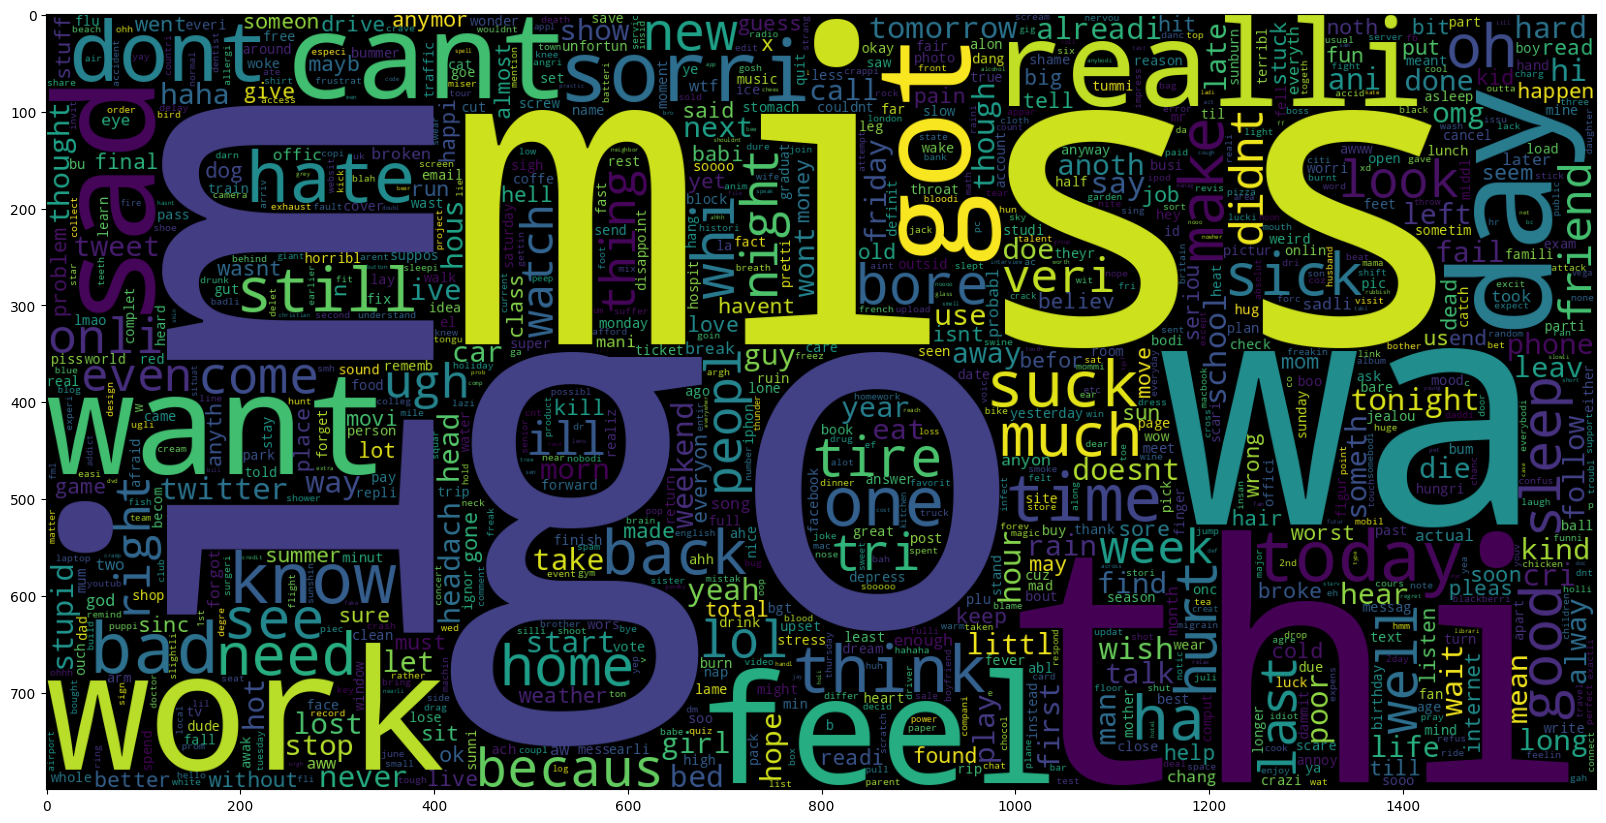

In [117]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data_neg = df[df['sentiment']=="negative"].text
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

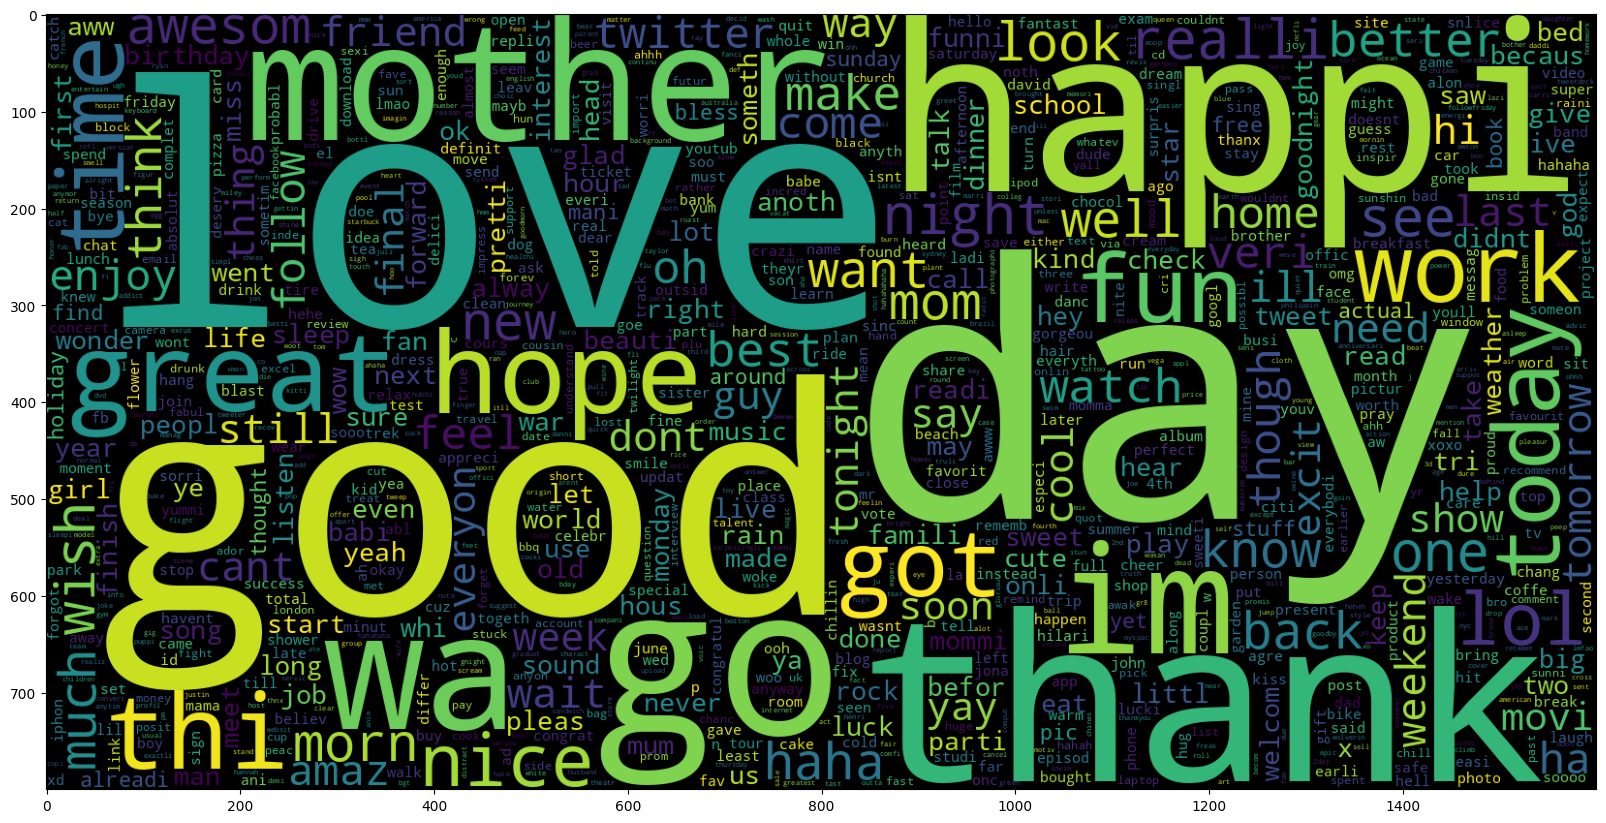

In [118]:
data_pos = df[df['sentiment']=="positive"].text
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

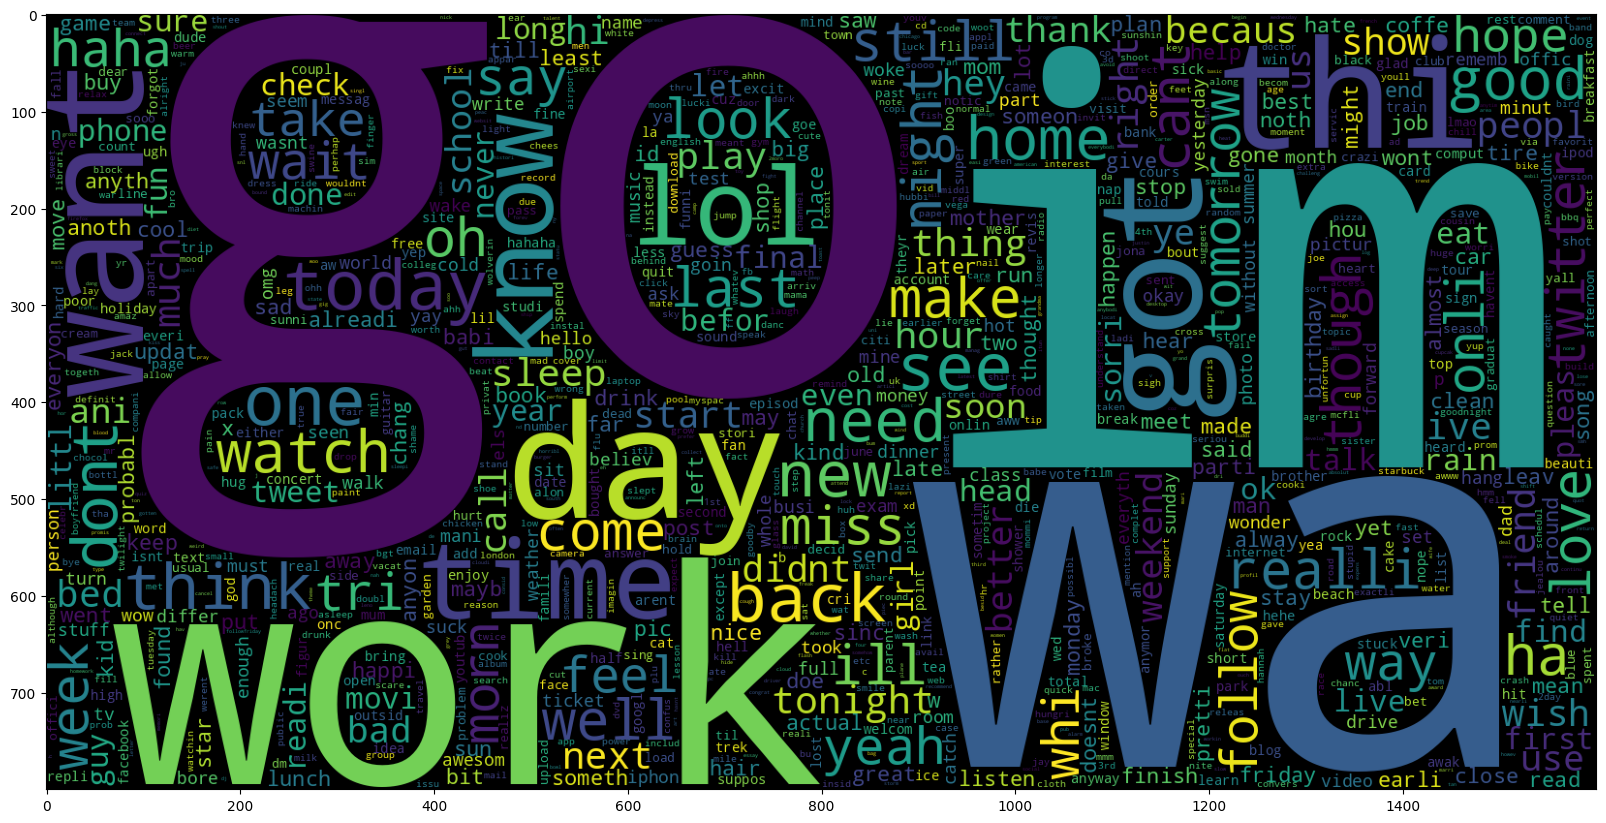

In [119]:
from wordcloud import WordCloud
data_neu = df[df['sentiment']=="neutral"].text
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neu))
plt.imshow(wc)

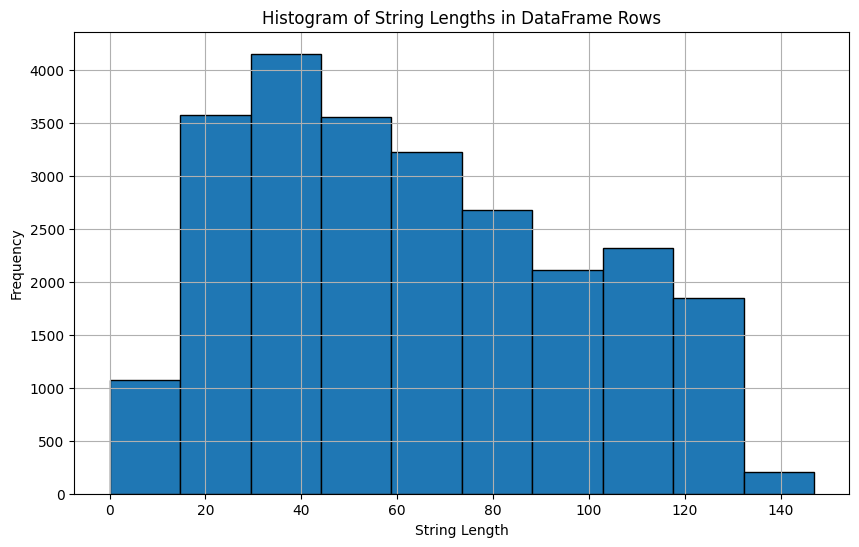

In [121]:
from matplotlib import pyplot as plt
df['length'] = df['cleaned_text'].apply(len)

# Plot the lengths
plt.figure(figsize=(10, 6))
plt.hist(df['length'], bins=10, edgecolor='black')
plt.title('Histogram of String Lengths in DataFrame Rows')
plt.xlabel('String Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

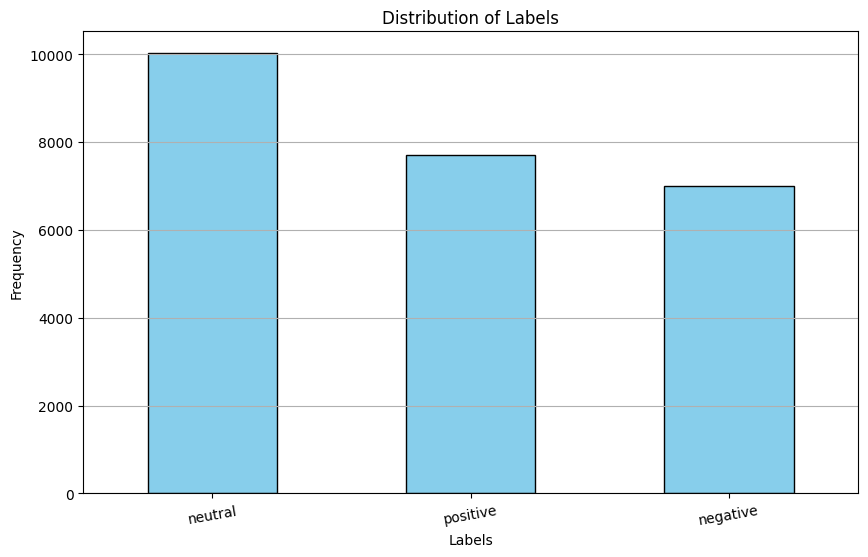

In [122]:
label_counts = df['sentiment'].value_counts()

# Plot the label distribution using a bar plot
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=10)
plt.grid(axis='y')
plt.show()

In [126]:
all_tokens = set([token for tokens in df['tokens'] for token in tokens])
print(f'Number of unique tokens: {len(all_tokens)}')

Number of unique tokens: 21149


In [127]:
all_couples_of_tokens = set([f'{tokens[i]} {tokens[i+1]}' if tokens[i] < tokens[i+1] else f'{tokens[i+1]} {tokens[i]}' for tokens in df['tokens'] for i in range(len(tokens)-1)])
print(f'Number of couples of tokens: {len(all_couples_of_tokens)}')

Number of couples of tokens: 111910
